In [1]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [2]:
#Import any library here only.
import os
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [3]:
#Setup and check a gpu connection.


In [4]:
# ''' Do not change this cell '''
# check_gpu()

NameError: name 'tf' is not defined

In [ ]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.


In [ ]:

data_dir = 'OpenCodeData/OpenCodeData'  

images = []
labels = []

viral_count = 0
bacterial_count = 0

for root, dirs, files in os.walk(data_dir):
    for filename in files:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(root, filename)
            if 'virus' in filename:
                labels.append('VIRAL')
                viral_count += 1
            elif 'bacteria' in filename:
                labels.append('BACTERIAL')
                bacterial_count += 1
            else:
                labels.append('NORMAL')  
            
            images.append(img_path)

print(f"Number of Viral Images: {viral_count}")
print(f"Number of Bacterial Images: {bacterial_count}")

count_normal = sum(1 for label in labels if label == 'NORMAL')
count_infected = sum(1 for label in labels if label == 'BACTERIAL' or label == 'VIRAL' )

print(f"Count of NORMAL images: {count_normal}")
print(f"Count of INFECTED images: {count_infected}")

Number of Viral Images: 148
Number of Bacterial Images: 242
Count of NORMAL images: 234
Count of INFECTED images: 390


In [ ]:
# import random

# normal_images = [img for img, label in zip(images, labels) if label == 'NORMAL']
# infected_images = [img for img, label in zip(images, labels) if label != 'NORMAL']

# random.shuffle(infected_images)

# num_normal_images = len(normal_images)
# equal_infected_images = infected_images[:num_normal_images]

# images = normal_images + equal_infected_images
# labels = ['NORMAL'] * num_normal_images + ['INFECTED'] * num_normal_images

# count_normal = sum(1 for label in labels if label == 'NORMAL')
# count_infected = sum(1 for label in labels if label == 'INFECTED')

# print(f"Count of NORMAL images: {count_normal}")
# print(f"Count of INFECTED images: {count_infected}")

Count of NORMAL images: 234
Count of INFECTED images: 234


In [ ]:
''' Do not change this cell '''
check_data("task1")

TypeError: check_data() takes 0 positional arguments but 1 was given

In [ ]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.


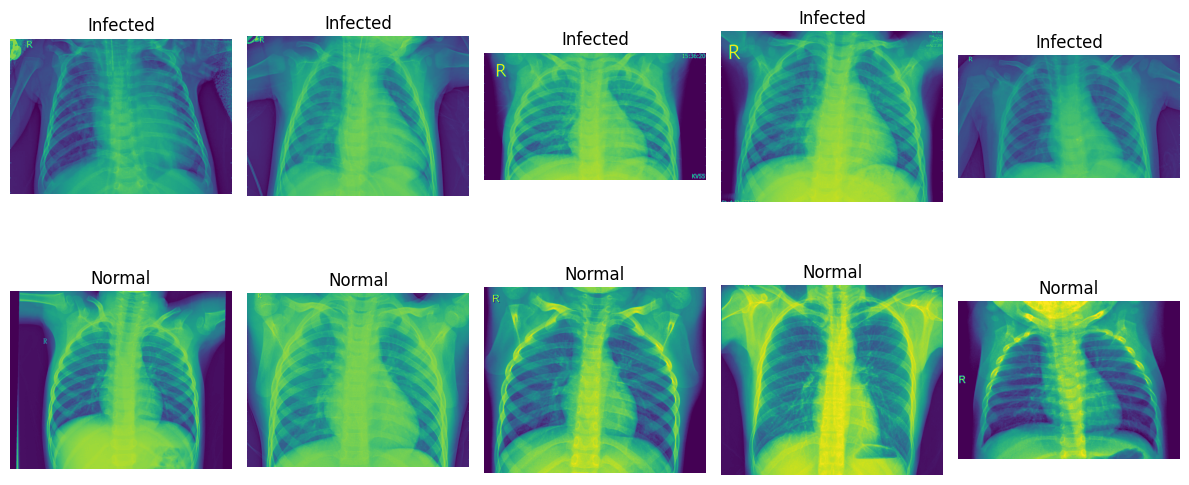

In [ ]:

infected_folder = 'OpenCodeData/OpenCodeData/INFECTED/'
normal_folder = 'OpenCodeData/OpenCodeData/NORMAL/'

infected_images = [infected_folder + img for img in os.listdir(infected_folder)]
normal_images = [normal_folder + img for img in os.listdir(normal_folder)]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    img = Image.open(infected_images[i])
    plt.imshow(img)
    plt.title("Infected")
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    img = Image.open(normal_images[i])
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    resized_img = img.resize((128, 128))


    return resized_img

processed_images = []
for img_path in images:
    processed_img = preprocess_image(img_path)
    processed_images.append(processed_img)

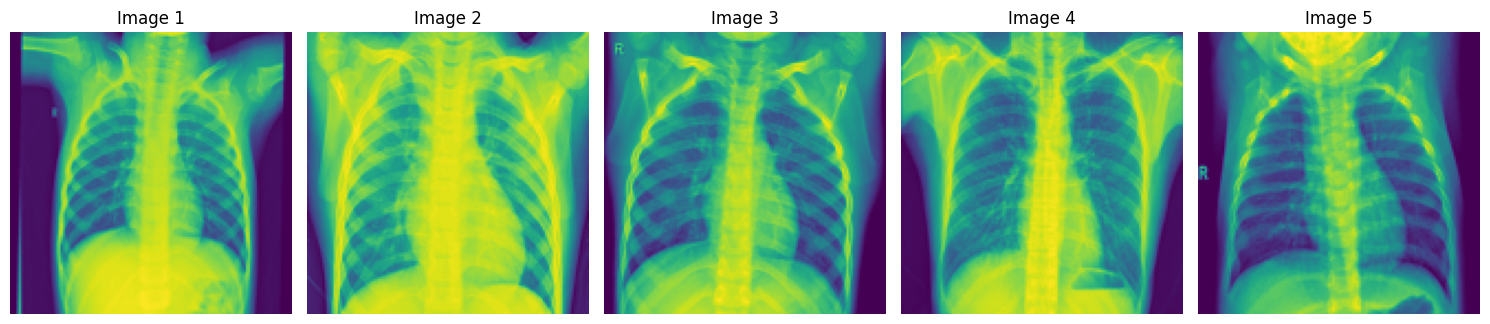

In [ ]:
import matplotlib.pyplot as plt

num_images_to_plot = 5

fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i in range(num_images_to_plot):
    axes[i].imshow(processed_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_images, test_val_images, train_labels, test_val_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

test_images, val_images, test_labels, val_labels = train_test_split(
    test_val_images, test_val_labels, test_size=0.5, random_state=42)

In [ ]:
def augment_images_inplace(images_list, labels_list):
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images_list, labels_list):
        rotated_images = [img.rotate(angle) for angle in [10, -10, 20, -20]]
        
        for rotated_img in rotated_images:
            augmented_images.append(rotated_img)
            augmented_labels.append(label)

        flipped_image = img.transpose(Image.FLIP_LEFT_RIGHT)
        enhanced_image = ImageEnhance.Brightness(img).enhance(1.5)

        augmented_images.extend([flipped_image, enhanced_image])
        augmented_labels.extend([label, label])

    return augmented_images, augmented_labels

augmented_train_images, augmented_train_labels = augment_images_inplace(train_images, train_labels)




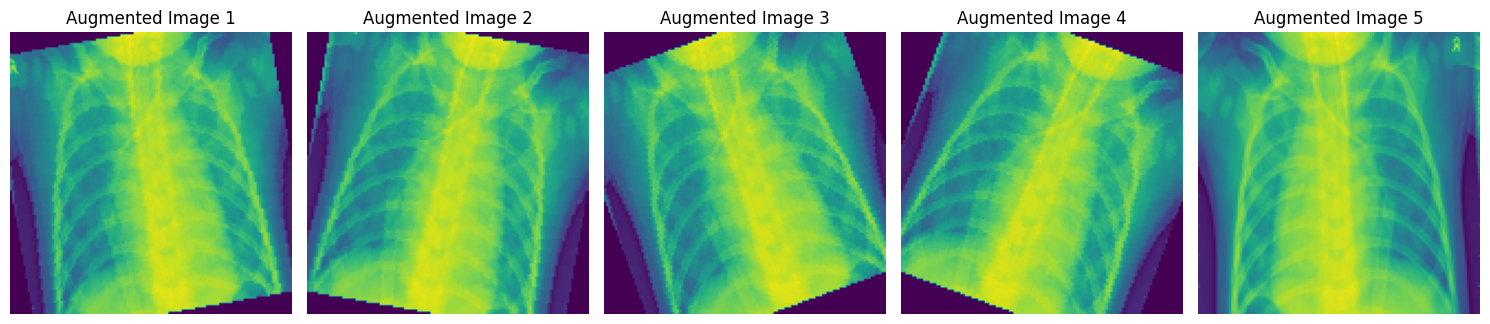

In [ ]:
import matplotlib.pyplot as plt

num_images_to_plot = 5

fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i in range(num_images_to_plot):

    axes[i].imshow(augmented_train_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Augmented Image {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
print(len(augmented_train_labels),len(augmented_train_images))

2244 2244


In [ ]:
import numpy as np
augmented_train_images = np.array([np.array(img) for img in augmented_train_images])
augmented_train_images = np.expand_dims(augmented_train_images, axis=-1)  

augmented_train_images = augmented_train_images / 255.0
augmented_train_labels = np.array(augmented_train_labels)

val_images = np.array([np.array(img) for img in val_images])
val_images = np.expand_dims(val_images, axis=-1)
# test_images = np.array([np.array(img) for img in test_images])
# test_images = np.expand_dims(test_images, axis=-1)
val_images = val_images / 255.0
val_labels = np.array(val_labels)

label_mapping = {'VIRAL': 0, 'BACTERIAL': 1, 'NORMAL': 1}

encoded_train_labels = [label_mapping[label] for label in augmented_train_labels]
encoded_val_labels = [label_mapping[label] for label in val_labels]
encoded_train_labels = np.array(encoded_train_labels)
encoded_val_labels = np.array(encoded_val_labels)

test_images = np.array([np.array(img) for img in test_images])
test_images = np.expand_dims(test_images, axis=-1)
test_images = test_images / 255.0

test_labels = np.array([label_mapping[label] for label in test_labels])


In [ ]:
print(augmented_train_images.shape)


(2994, 128, 128, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])






2023-12-20 18:23:15.754087: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 18:23:15.755967: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 18:23:15.775093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 18:23:15.775122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 18:23:15.775920: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [ ]:
history = model.fit(augmented_train_images, encoded_train_labels, epochs=10, batch_size=32, validation_data=(val_images, encoded_val_labels))


Epoch 1/10
94/94 [==============================] - 12s 120ms/step - loss: 0.4904 - accuracy: 0.7912 - val_loss: 0.2951 - val_accuracy: 0.9048
Epoch 2/10
94/94 [==============================] - 11s 121ms/step - loss: 0.3439 - accuracy: 0.8674 - val_loss: 0.2446 - val_accuracy: 0.9206
Epoch 3/10
94/94 [==============================] - 12s 126ms/step - loss: 0.3036 - accuracy: 0.8868 - val_loss: 0.2676 - val_accuracy: 0.9048
Epoch 4/10
94/94 [==============================] - 12s 128ms/step - loss: 0.2633 - accuracy: 0.9081 - val_loss: 0.2192 - val_accuracy: 0.9048
Epoch 5/10
94/94 [==============================] - 12s 126ms/step - loss: 0.2336 - accuracy: 0.9058 - val_loss: 0.2068 - val_accuracy: 0.9524
Epoch 6/10
94/94 [==============================] - 12s 123ms/step - loss: 0.1778 - accuracy: 0.9302 - val_loss: 0.2441 - val_accuracy: 0.9206
Epoch 7/10
94/94 [==============================] - 11s 122ms/step - loss: 0.1361 - accuracy: 0.9509 - val_loss: 0.2204 - val_accuracy: 0.9365

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

predictions = model.predict(val_images)

predicted_labels = np.argmax(predictions, axis=1)

print("Accuracy:", accuracy_score(encoded_val_labels, predicted_labels))
print("F1 Score:", f1_score(encoded_val_labels, predicted_labels, average='weighted'))  
print("Classification Report:")
print(classification_report(encoded_val_labels, predicted_labels))


2/2 [==============================] - 0s 33ms/step
Accuracy: 0.9365079365079365
F1 Score: 0.93505291005291
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.94      0.98      0.96        47

    accuracy                           0.94        63
   macro avg       0.93      0.90      0.91        63
weighted avg       0.94      0.94      0.94        63



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

test_predictions = model.predict(test_images)

predicted_test_labels = np.argmax(test_predictions, axis=1)

print("Accuracy:", accuracy_score(test_labels, predicted_test_labels))
print("F1 Score:", f1_score(test_labels, predicted_test_labels, average='weighted'))
print("Classification Report:")
print(classification_report(test_labels, predicted_test_labels))


2/2 [==============================] - 0s 32ms/step
Accuracy: 0.967741935483871
F1 Score: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.98      0.98      0.98        51

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
model.save('My_model.h5')


/home/outbreakkp/anaconda3/envs/nlp/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import roc_auc_score

train_predictions = model.predict(augmented_train_images)
val_predictions = model.predict(val_images)

train_auc = roc_auc_score(encoded_train_labels, train_predictions[:, 1])  # Use train_predictions for AUC calculation
val_auc = roc_auc_score(encoded_val_labels, val_predictions[:, 1])

print("Training AUC Score:", train_auc)
print("Validation AUC Score:", val_auc)


2/2 [==============================] - 0s 34ms/step
Training AUC Score: 0.9983067811350641
Validation AUC Score: 0.961436170212766


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

val_predictions = model.predict(val_images_np)
train_predictions = model.predict(train_images_np)

train_auc = roc_auc_score(encoded_train_labels, train_predictions[:, 1])
val_auc = roc_auc_score(encoded_val_labels, val_predictions[:, 1])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot([train_auc] * len(train_loss), label='Training AUC', linestyle='--')
plt.plot([val_auc] * len(val_loss), label='Validation AUC', linestyle='--')
plt.title('Training and Validation AUC Score')
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.legend()

plt.tight_layout()

plt.savefig('metrics_plot.jpg', format='jpeg', dpi=300)
plt.show()



NameError: name 'history' is not defined